<a href="https://colab.research.google.com/github/cpython-projects/da_1709/blob/main/lesson_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

## Що таке візуалізація?

**Візуалізація даних** — це перетворення чисел у графіки. Це допомагає:

* Побачити тренди, зв’язки, аномалії;
* Краще пояснити дані замовнику чи колезі;
* Пояснити аналітику не-технічній аудиторії.
* Виявити помилки у даних;
* Підготувати звіти чи презентації.

> **Поганий графік гірше відсутності графіка.**

## На що звертати увагу

1. **Шкала (scale)**: чи є змінна кількісною, порядковою чи категоріальною.
2. **Вибір типу графіка**: scatter, bar, box, histogram — мають різні цілі.
3. **Агрегація**: barplot по середньому ≠ медіані.
4. **Пропуски та викиди**: не всі графіки "прощають" `NaN`.
5. **Маніпуляція масштабом**: неправильна шкала осі Y може спотворити висновки.
6. **Колір, форма, розмір**: візуальна увага зосереджується на яскравому — це впливає на інтерпретацію.

## Базові принципи якісної візуалізації:

| Принцип               | Пояснення                                                  |
| --------------------- | ---------------------------------------------------------- |
| 1. 📐 Адекватна шкала | Не змінюйте шкали так, щоб спотворити дані.                |
| 2. 🎯 Простота        | Один графік — одна ідея. Уникайте перенавантаження.        |
| 3. 🧩 Пояснення       | Підписи осей, легенди, заголовки — обов’язкові.            |
| 4. 🎨 Колір з сенсом  | Використовуйте колір, тільки якщо він щось означає.        |
| 5. ⚠️ Контекст        | Без осі, без одиниць виміру — це не графік, а маніпуляція. |

## Як графіки можуть обманювати?

**Приклад 1: Обрізана вісь Y**

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

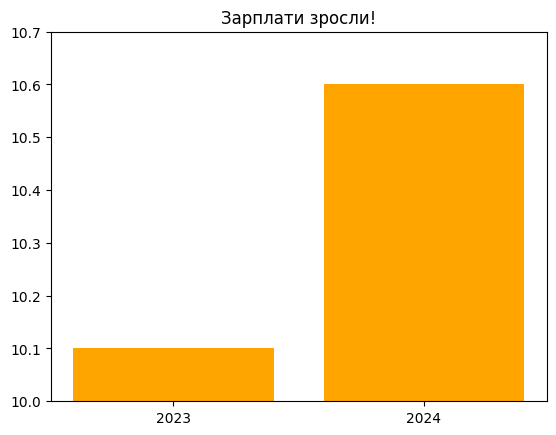

In [ ]:
plt.bar(['2023', '2024'], [10.1, 10.6], color='orange')
plt.ylim(10, 10.7)
plt.title("Зарплати зросли!")
plt.show()

> Виглядає, наче зарплата підскочила вдвічі, хоча зростання — лише 5%.

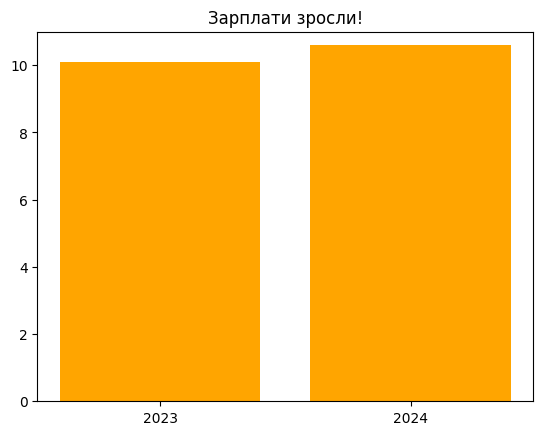

In [ ]:
plt.bar(['2023', '2024'], [10.1, 10.6], color='orange')
plt.ylim(0, 11)
plt.title("Зарплати зросли!")
plt.show()

**Приклад 2: Зміна масштабу X/Y**

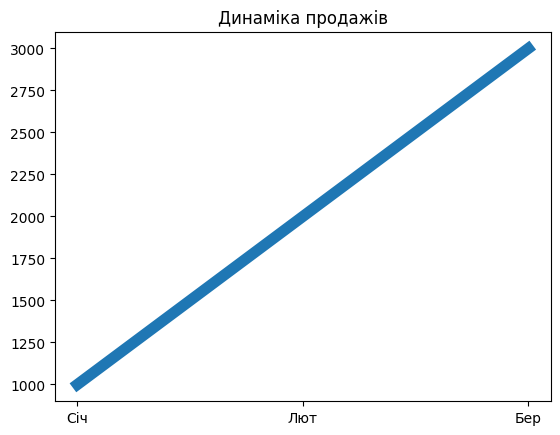

In [ ]:
plt.plot([1, 2, 3], [1000, 2000, 3000], label="Продажі", linewidth=8)
plt.xticks([1, 2, 3], ['Січ', 'Лют', 'Бер'])
plt.title("Динаміка продажів")
plt.show()


> Лінія крута, бо лінії візуально підкреслюють зміну, навіть якщо вона лінійна.

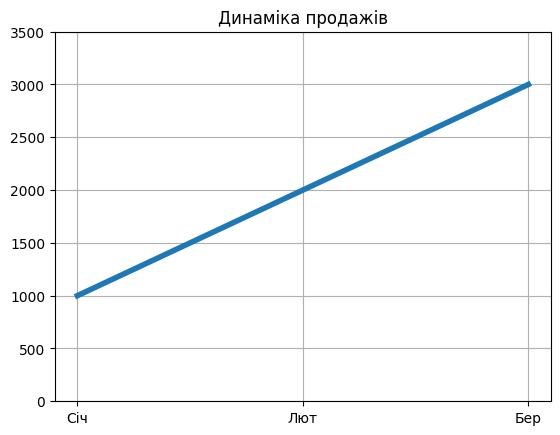

In [ ]:
plt.plot([1, 2, 3], [1000, 2000, 3000], label="Продажі", linewidth=4)
plt.xticks([1, 2, 3], ['Січ', 'Лют', 'Бер'])
plt.ylim(0, 3500)
plt.title("Динаміка продажів")
plt.grid(True)
plt.show()


## Приклади неякісної візуалізації

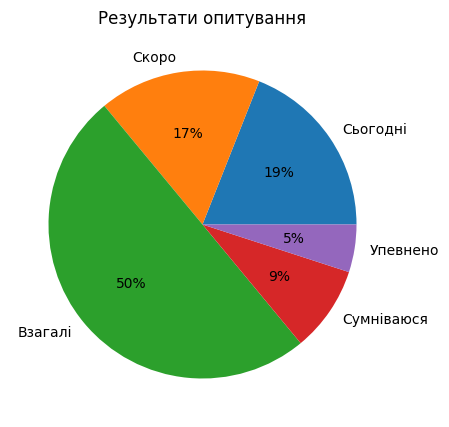

In [16]:
# ---------------------------------------------------------
# 1. Кругова діаграма — "Результати опитування"
# ---------------------------------------------------------
labels = ["Сьогодні", "Скоро", "Взагалі", "Сумніваюся", "Упевнено"]
sizes = [19, 17, 50, 9, 5]

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, labels=labels, autopct='%1.0f%%')
ax1.set_title("Результати опитування")
plt.show()

### 🔴 Чому графік неефективний

* Кругові діаграми погано передають різницю між секторами.
* Людське око погано оцінює кути → важко порівнювати значення.
* Багато категорій = текст дрібний.
* Немає чіткого порядку → інтерпретація сповільнюється.

### 🟢 Кращий варіант

**Горизонтальна стовпчикова діаграма**

* Легко порівнювати.
* Можна сортувати.
* Текст читабельний.

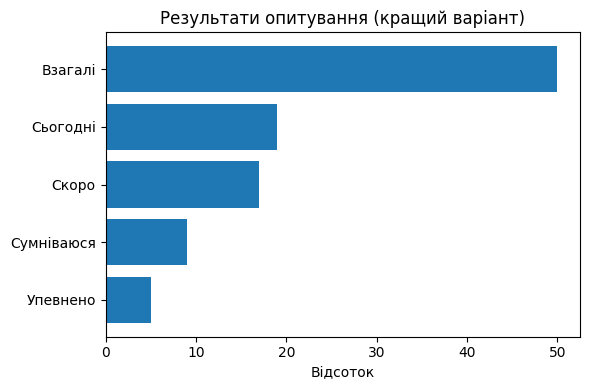

In [17]:
# Сортування для кращої читаємості
sizes_sorted, labels_sorted = zip(*sorted(zip(sizes, labels)))

plt.figure(figsize=(6,4))
plt.barh(labels_sorted, sizes_sorted)
plt.title("Результати опитування (кращий варіант)")
plt.xlabel("Відсоток")
plt.tight_layout()
plt.show()

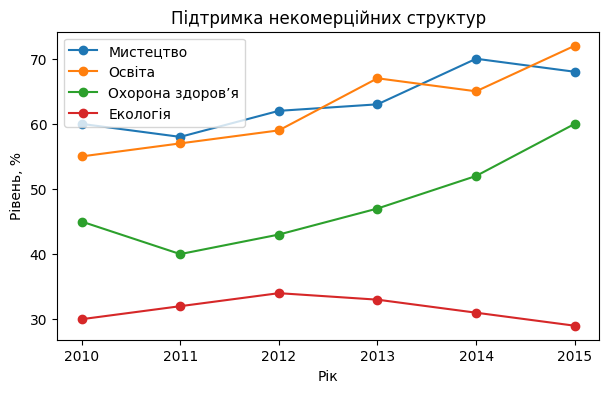

In [3]:
# ---------------------------------------------------------
# 2. Лінійний графік — "Підтримка некомерційних структур"
# ---------------------------------------------------------
years = [2010, 2011, 2012, 2013, 2014, 2015]

arts =      [60, 58, 62, 63, 70, 68]
education = [55, 57, 59, 67, 65, 72]
health =    [45, 40, 43, 47, 52, 60]
environment=[30, 32, 34, 33, 31, 29]

fig2, ax2 = plt.subplots(figsize=(7,4))
ax2.plot(years, arts,        marker="o", label="Мистецтво")
ax2.plot(years, education,   marker="o", label="Освіта")
ax2.plot(years, health,      marker="o", label="Охорона здоров’я")
ax2.plot(years, environment, marker="o", label="Екологія")

ax2.set_title("Підтримка некомерційних структур")
ax2.set_xlabel("Рік")
ax2.set_ylabel("Рівень, %")
ax2.legend()
plt.show()

### 🔴 Чому графік неефективний

* Забагато ліній → втрачається читабельність.
* Легенда громіздка.
* Перетини ліній роблять графік шумним.
* Значення не показані напряму.

### 🟢 Кращий варіант

**Фасет-графік (по одному графіку на категорію)**

* Кожна категорія читається окремо.
* Легко порівнювати тренди.

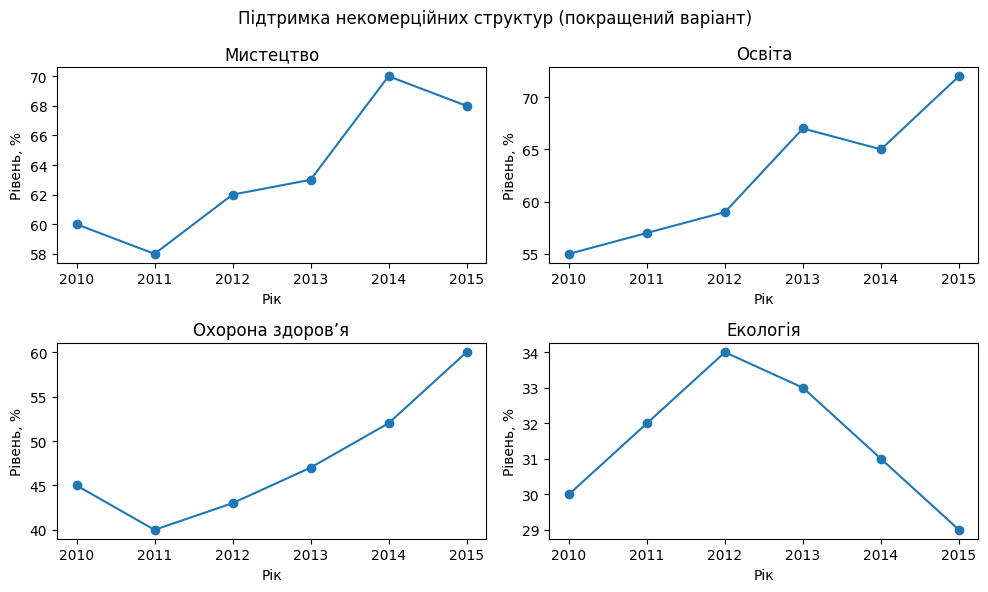

In [19]:
years = [2010, 2011, 2012, 2013, 2014, 2015]
data = {
    "Мистецтво": [60, 58, 62, 63, 70, 68],
    "Освіта": [55, 57, 59, 67, 65, 72],
    "Охорона здоров’я": [45, 40, 43, 47, 52, 60],
    "Екологія": [30, 32, 34, 33, 31, 29]
}

fig, axes = plt.subplots(2, 2, figsize=(10,6))

for ax, (name, values) in zip(axes.flat, data.items()):
    ax.plot(years, values, marker="o")
    ax.set_title(name)
    ax.set_xlabel("Рік")
    ax.set_ylabel("Рівень, %")

fig.suptitle("Підтримка некомерційних структур (покращений варіант)")
plt.tight_layout()
plt.show()

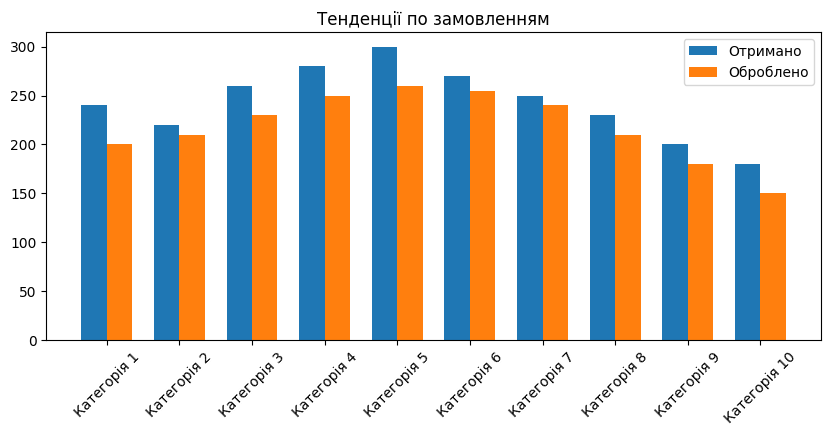

In [21]:
# ---------------------------------------------------------
# 3. Стовпчикова діаграма — "Тенденції по замовленням"
# ---------------------------------------------------------
categories = [f"Категорія {i}" for i in range(1, 11)]
received =   [240, 220, 260, 280, 300, 270, 250, 230, 200, 180]
processed =  [200, 210, 230, 250, 260, 255, 240, 210, 180, 150]

x = np.arange(len(categories))
w = 0.35

fig3, ax3 = plt.subplots(figsize=(10,4))
ax3.bar(x - w/2, received,  width=w, label="Отримано")
ax3.bar(x + w/2, processed, width=w, label="Оброблено")

ax3.set_title("Тенденції по замовленням")
ax3.set_xticks(x)
ax3.set_xticklabels(categories, rotation=45)
ax3.legend()
plt.show()

### 🔴 Чому графік неефективний

* Забагато категорій -> 10 x 2 бари = візуальний шум.
* Важко порівняти різницю між “отримано” і “оброблено”.
* Підписи дрібні та повернуті.

### 🟢 Кращий варіант

**Графік різниці ("отримано − оброблено")**

* Відразу видно відставання обробки.
* Менше шуму, легше інтерпретувати.

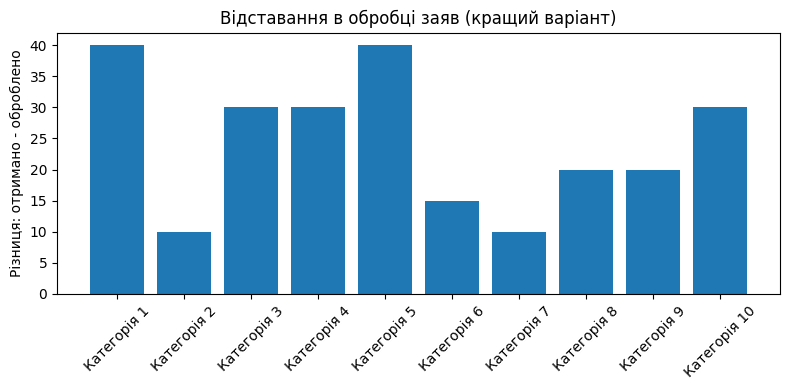

In [22]:
categories = [f"Категорія {i}" for i in range(1, 11)]
received = np.array([240, 220, 260, 280, 300, 270, 250, 230, 200, 180])
processed = np.array([200, 210, 230, 250, 260, 255, 240, 210, 180, 150])

difference = received - processed

plt.figure(figsize=(8,4))
plt.bar(categories, difference)
plt.title("Відставання в обробці заяв (кращий варіант)")
plt.ylabel("Різниця: отримано - оброблено")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

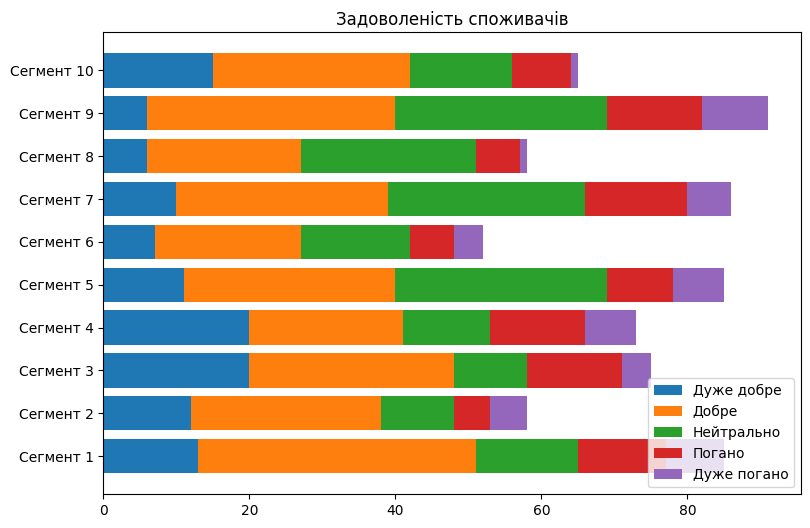

In [23]:
# ---------------------------------------------------------
# 4. Горизонтальні stacked bars — "Задоволеність споживачів"
# ---------------------------------------------------------
segments = [f"Сегмент {i}" for i in range(1, 11)]

very =     np.random.randint(5, 25, 10)
good =     np.random.randint(20, 40, 10)
neutral =  np.random.randint(10, 30, 10)
bad =      np.random.randint(5, 15, 10)
awful =    np.random.randint(1, 10, 10)

fig4, ax4 = plt.subplots(figsize=(9,6))
ax4.barh(segments, very,     label="Дуже добре")
ax4.barh(segments, good,     left=very,     label="Добре")
ax4.barh(segments, neutral,  left=very+good,     label="Нейтрально")
ax4.barh(segments, bad,      left=very+good+neutral,     label="Погано")
ax4.barh(segments, awful,    left=very+good+neutral+bad, label="Дуже погано")

ax4.set_title("Задоволеність споживачів")
ax4.legend(loc="lower right")
plt.show()

### 🔴 Чому графік неефективний

* 10 сегментів × 5 категорій = 50 кольорових блоків.
* Дуже важко прочитати.
* Неможливо відстежити патерни.
* Stacked bars погано порівнюються (крім першої категорії).

### 🟢 Кращий варіант

**Нормалізований stacked bar (100%)**

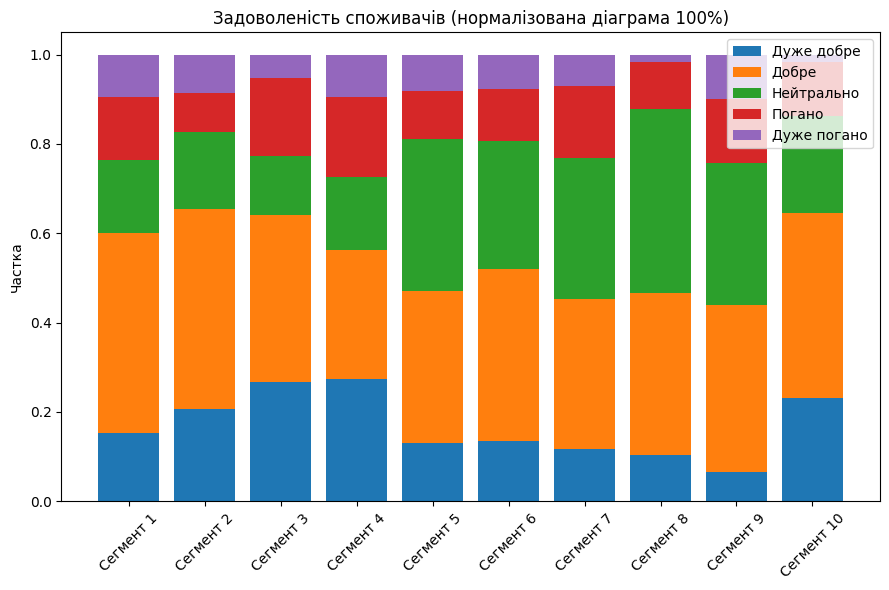

In [24]:
data = np.vstack([very, good, neutral, bad, awful])

# Нормалізація до 100%
data_pct = data / data.sum(axis=0)

labels = ["Дуже добре", "Добре", "Нейтрально", "Погано", "Дуже погано"]

plt.figure(figsize=(9,6))

bottom = np.zeros(len(segments))

for row, label in zip(data_pct, labels):
    plt.bar(segments, row, bottom=bottom, label=label)
    bottom += row

plt.title("Задоволеність споживачів (нормалізована діаграма 100%)")
plt.ylabel("Частка")
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()


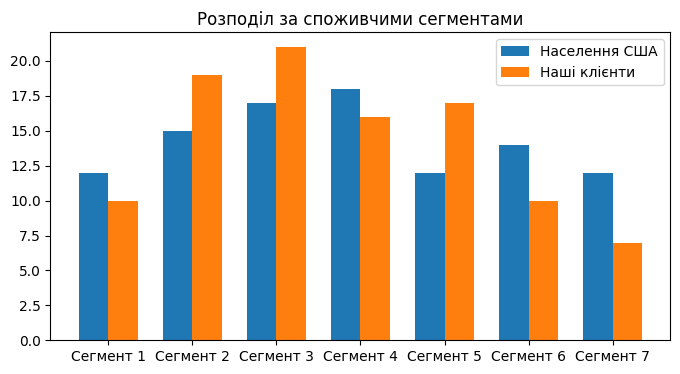

In [25]:
# ---------------------------------------------------------
# 5. Дві стовпчикові серії — "Розподіл за споживчими сегментами"
# ---------------------------------------------------------
segments = [f"Сегмент {i}" for i in range(1, 8)]
us_pop =    [12, 15, 17, 18, 12, 14, 12]
our_clients=[10, 19, 21, 16, 17, 10, 7]

x = np.arange(len(segments))
w = 0.35

fig5, ax5 = plt.subplots(figsize=(8,4))
ax5.bar(x - w/2, us_pop, width=w, label="Населення США")
ax5.bar(x + w/2, our_clients, width=w, label="Наші клієнти")

ax5.set_title("Розподіл за споживчими сегментами")
ax5.set_xticks(x)
ax5.set_xticklabels(segments)
ax5.legend()
plt.show()

### 🔴 Чому графік неефективний

* Side-by-side bars для 7 категорій → важко читати.
* Маленькі відмінності зникають.
* Важко помітити пропорції.

### 🟢 Кращий варіант

**Лінійний графік / або різниця між групами**

Показ різниці → дає інсайт миттєво.

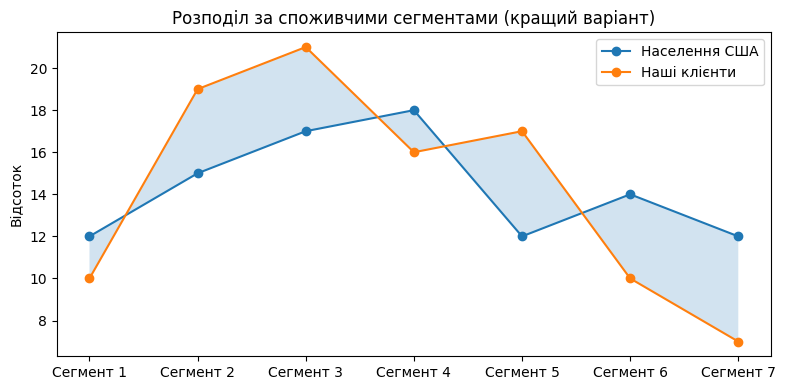

In [26]:
segments = [f"Сегмент {i}" for i in range(1, 8)]
us = np.array([12, 15, 17, 18, 12, 14, 12])
clients = np.array([10, 19, 21, 16, 17, 10, 7])

diff = clients - us

plt.figure(figsize=(8,4))
plt.plot(segments, us, marker='o', label="Населення США")
plt.plot(segments, clients, marker='o', label="Наші клієнти")
plt.fill_between(segments, us, clients, alpha=0.2)

plt.title("Розподіл за споживчими сегментами (кращий варіант)")
plt.ylabel("Відсоток")
plt.legend()
plt.tight_layout()
plt.show()

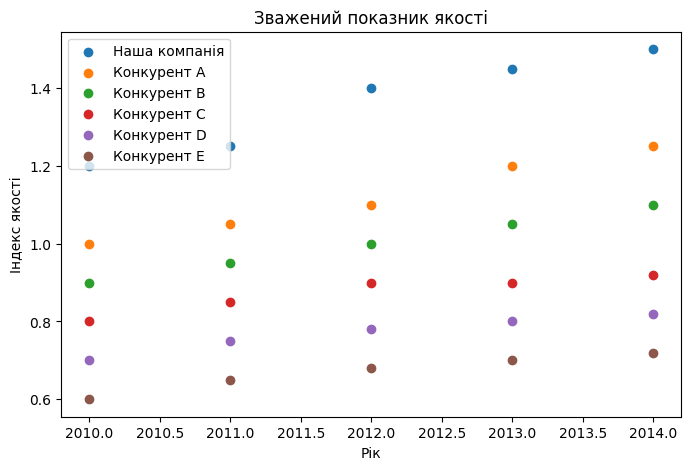

In [27]:
# ---------------------------------------------------------
# 6. Діаграма з точками — "Зважений показник якості"
# ---------------------------------------------------------
years = [2010, 2011, 2012, 2013, 2014]

competitors = {
    "Наша компанія": [1.2, 1.25, 1.4, 1.45, 1.5],
    "Конкурент A":   [1.0, 1.05, 1.1, 1.2, 1.25],
    "Конкурент B":   [0.9, 0.95, 1.0, 1.05, 1.1],
    "Конкурент C":   [0.8, 0.85, 0.9, 0.9, 0.92],
    "Конкурент D":   [0.7, 0.75, 0.78, 0.8, 0.82],
    "Конкурент E":   [0.6, 0.65, 0.68, 0.7, 0.72],
}

fig6, ax6 = plt.subplots(figsize=(8,5))

for name, values in competitors.items():
    ax6.scatter(years, values, label=name)

ax6.set_title("Зважений показник якості")
ax6.set_xlabel("Рік")
ax6.set_ylabel("Індекс якості")
ax6.legend()
plt.show()


### 🔴 Чому графік неефективний

* 6 конкурентів × 5 років → хаос.
* Кольори подібні.
* Точки без ліній → важко побачити тренд.
* Немає структури.

### 🟢 Кращий варіант

**Лінійний графік у фасетах (один конкурент = один маленький графік)**

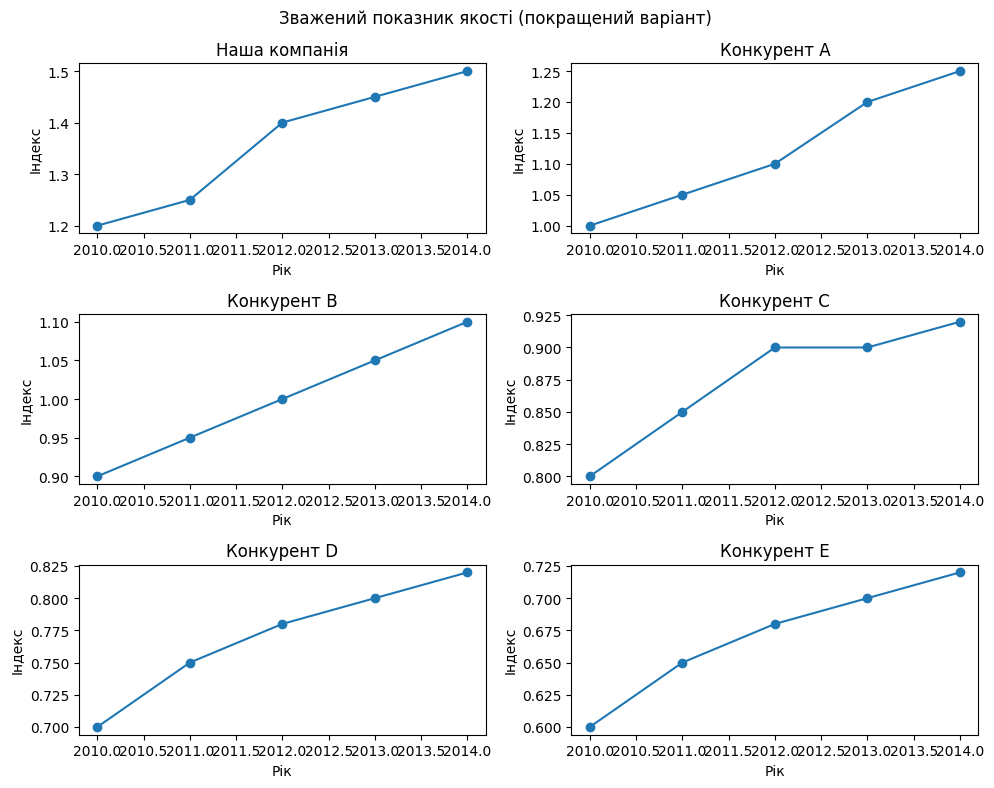

In [28]:
years = [2010, 2011, 2012, 2013, 2014]
competitors = {
    "Наша компанія": [1.2, 1.25, 1.4, 1.45, 1.5],
    "Конкурент A":   [1.0, 1.05, 1.1, 1.2, 1.25],
    "Конкурент B":   [0.9, 0.95, 1.0, 1.05, 1.1],
    "Конкурент C":   [0.8, 0.85, 0.9, 0.9, 0.92],
    "Конкурент D":   [0.7, 0.75, 0.78, 0.8, 0.82],
    "Конкурент E":   [0.6, 0.65, 0.68, 0.7, 0.72],
}

fig, axes = plt.subplots(3, 2, figsize=(10,8))

for ax, (name, values) in zip(axes.flat, competitors.items()):
    ax.plot(years, values, marker="o")
    ax.set_title(name)
    ax.set_xlabel("Рік")
    ax.set_ylabel("Індекс")

fig.suptitle("Зважений показник якості (покращений варіант)")
plt.tight_layout()
plt.show()


## Бібліотеки

**Seaborn**

* Побудований на основі matplotlib.
* Простий синтаксис для статистичних графіків.
* Добре підходить для дослідницького аналізу (EDA).

**Plotly**

* Інтерактивні графіки.
* Підходить для презентацій, дашбордів.
* Можна наводити, збільшувати, клікати.

In [ ]:
!pip install seaborn

## Гістограма

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/cpython-projects/da_1305/refs/heads/main/real_estate_data.csv')
df.head()

,Unnamed: 0,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,kitchen_area,balcony,locality_name,days_exposition
0,0,7312500.0,108.0,2024-05-15,3,2.70,16.0,51.0,8,NaN,False,25.0,NaN,Kyiv,NaN
1,1,1884375.0,40.4,2024-08-14,1,NaN,11.0,18.6,1,NaN,False,11.0,2.0,Brovary,81.0
2,2,2922750.0,56.0,2023-11-06,2,NaN,5.0,34.3,4,NaN,False,8.3,0.0,Kyiv,558.0
3,3,36506250.0,159.0,2024-03-19,3,NaN,14.0,NaN,9,NaN,False,NaN,0.0,Kyiv,424.0
4,4,5625000.0,100.0,2024-06-12,2,3.03,14.0,32.0,13,NaN,False,41.0,NaN,Kyiv,121.0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import plotly.express as px

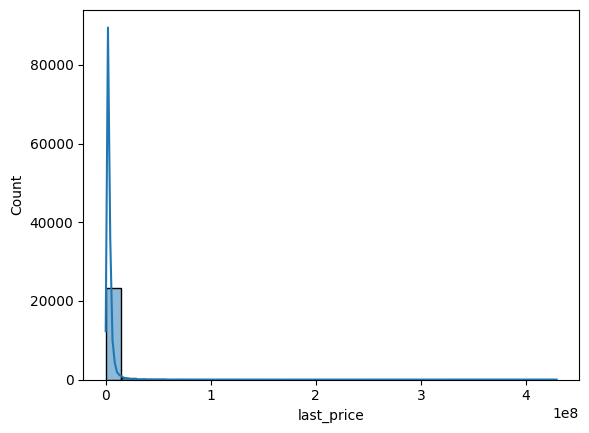

In [ ]:
sns.histplot(df['last_price'], bins=30, kde=True)
plt.show()

In [ ]:
px.histogram(df, x='last_price', nbins=30)

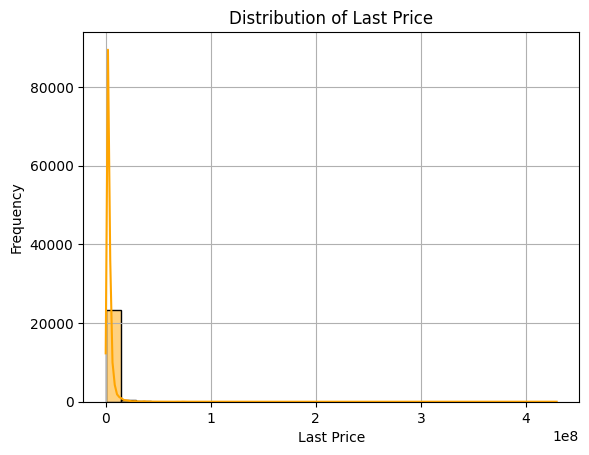

In [ ]:
sns.histplot(
    df['last_price'],
    bins=30,
    kde=True,
    color='orange',
    edgecolor='black',
    linewidth=1
    )
plt.xlabel('Last Price')
plt.ylabel('Frequency')
plt.title('Distribution of Last Price')
plt.grid(True)
plt.show()

## Boxplot (ящик з вусами)

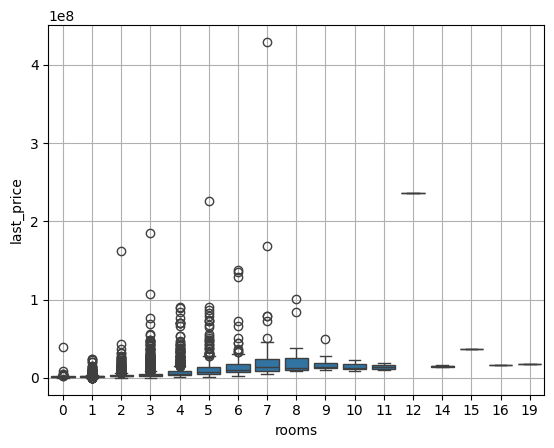

In [ ]:
sns.boxplot(data=df, x='rooms', y='last_price')
plt.grid(True)
plt.show()

In [ ]:
px.box(df, x='rooms', y='last_price')

In [ ]:
fig = px.box(df, y="last_price")
fig.show()

## Scatterplot (діграма розсіювання)

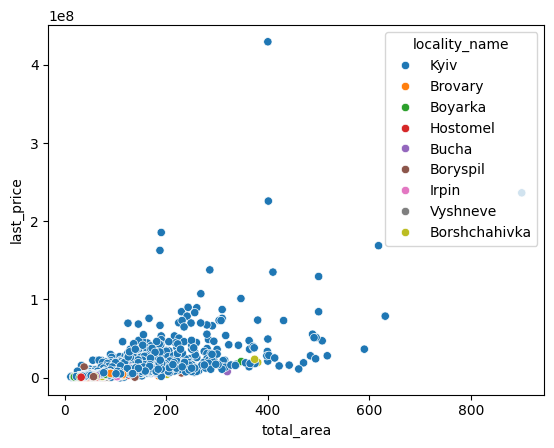

In [ ]:
sns.scatterplot(df, x='total_area', y='last_price', hue='locality_name')
plt.show()

In [ ]:
px.scatter(df, x='total_area', y='last_price', color='locality_name')

## Barplot (стовпчикова діаграма + агрегація)

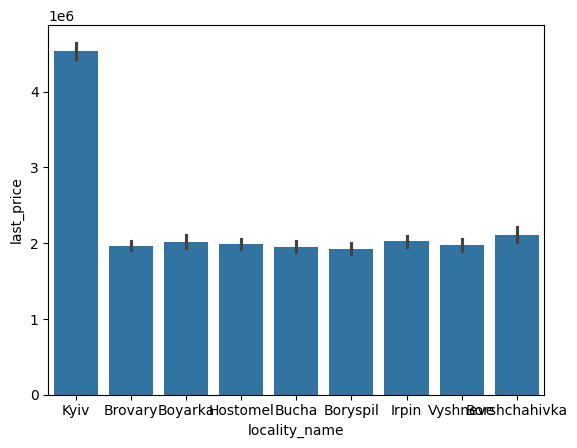

In [ ]:
sns.barplot(df, x='locality_name', y='last_price')
plt.show()

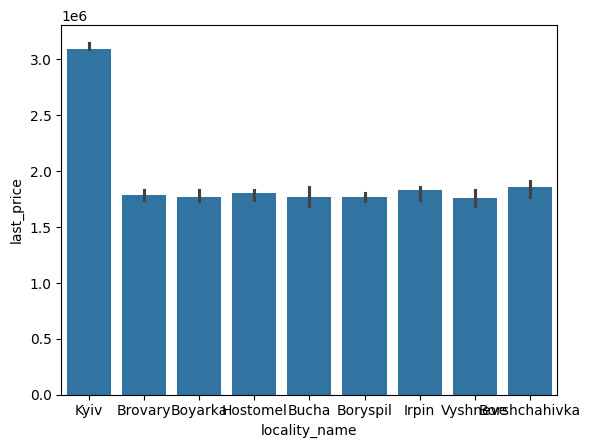

In [ ]:
sns.barplot(df, x='locality_name', y='last_price', estimator='median')
plt.show()

In [ ]:
df_group = df.groupby('locality_name')['last_price'].median().reset_index()
px.bar(df_group, x='locality_name', y='last_price')

## lineplot (лінійний графік)

In [ ]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])


In [ ]:
df['month'] = df.first_day_exposition.dt.to_period('M').dt.to_timestamp()

In [ ]:
df

,Unnamed: 0,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,kitchen_area,balcony,locality_name,days_exposition,month
0,0,7312500.0,108.00,2024-05-15,3,2.70,16.0,51.0,8,NaN,False,25.00,NaN,Kyiv,NaN,2024-05-01
1,1,1884375.0,40.40,2024-08-14,1,NaN,11.0,18.6,1,NaN,False,11.00,2.0,Brovary,81.0,2024-08-01
2,2,2922750.0,56.00,2023-11-06,2,NaN,5.0,34.3,4,NaN,False,8.30,0.0,Kyiv,558.0,2023-11-01
3,3,36506250.0,159.00,2024-03-19,3,NaN,14.0,NaN,9,NaN,False,NaN,0.0,Kyiv,424.0,2024-03-01
4,4,5625000.0,100.00,2024-06-12,2,3.03,14.0,32.0,13,NaN,False,41.00,NaN,Kyiv,121.0,2024-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,23694,5456250.0,133.81,2024-06-23,3,3.70,5.0,73.3,3,NaN,False,13.83,NaN,Kyiv,NaN,2024-06-01
23695,23695,1743750.0,59.00,2023-11-22,3,NaN,5.0,38.0,4,NaN,False,8.50,NaN,Borshchahivka,45.0,2023-11-01
23696,23696,1406250.0,56.70,2024-07-22,2,NaN,3.0,29.7,1,NaN,False,NaN,NaN,Boryspil,NaN,2024-07-01
23697,23697,6454688.0,76.75,2023-09-23,2,3.00,17.0,NaN,12,NaN,False,23.30,2.0,Kyiv,602.0,2023-09-01


In [ ]:
res = df.groupby('month')['last_price'].mean().reset_index()

In [ ]:
res.columns.to_list()

['month', 'last_price']

In [ ]:
px.line(res, x='month', y='last_price')